In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from keras import *
from keras.layers import *
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('trainset.csv')

In [140]:
print("Name:Visalan")
print("Register Number:212223240183")
train.head()

Name:Visalan
Register Number:212223240183


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [ ]:
train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
X=train.iloc[:,1:2].values

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X.shape

(1259, 1)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
X1=scaler.fit_transform(X)

In [ ]:

X1.shape

(1259, 1)

In [ ]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(X1[i-60:i,0])
  y_train_array.append(X1[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [ ]:
X_train1.shape

(1199, 60, 1)

In [ ]:
length = 60
n_features = 1

In [ ]:
model=Sequential()

In [ ]:
model.add(SimpleRNN(60,input_shape=(length,n_features)))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mae')

In [ ]:
model.fit(X_train1,y_train,epochs=100)

Epoch 1/100
38/38 [==============================] - 2s 12ms/step - loss: 0.0765
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0216
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0197
Epoch 4/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0171
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0141
Epoch 6/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0168
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0130
Epoch 8/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0126
Epoch 9/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0132
Epoch 10/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0116
Epoch 11/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0118
Epoch 12/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0110
Epoch 13/100
38/38 [=====

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_22 (SimpleRNN)   (None, 60)                3720      
                                                                 
 dense_9 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3781 (14.77 KB)
Trainable params: 3781 (14.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
dataset_test=pd.read_csv('testset.csv')

In [ ]:
test_set = dataset_test.iloc[:,1:2].values


In [ ]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
...,...,...,...,...,...,...,...
120,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
121,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
122,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
123,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [ ]:
test_set.shape

(125, 1)

In [ ]:
dataset_total = pd.concat((train['Open'],dataset_test['Open']),axis=0)


In [ ]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=scaler.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))


In [ ]:
X_test.shape


(1324, 60, 1)

In [ ]:
predicted_stock_price_scaled = model.predict(X_test)

42/42 [==============================] - 0s 5ms/step


In [ ]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price_scaled)

Name:Visalan H Register Number:212223240183


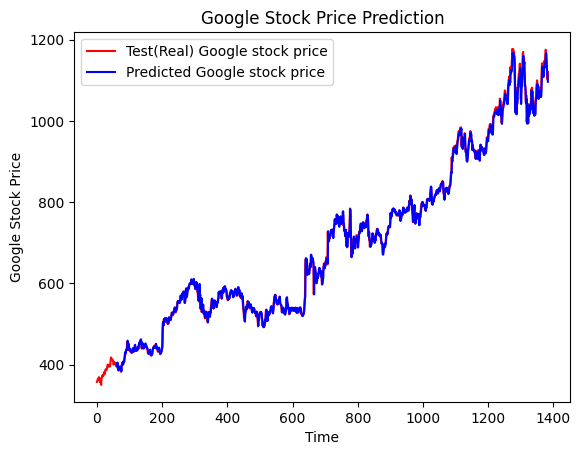

In [ ]:
print("Name:Visalan H Register Number:212223240183")
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()